In [1]:
import os
import numpy as np
from landlab import RasterModelGrid
import landlab
from landlab.io import read_esri_ascii
from landlab.io.esri_ascii import write_esri_ascii
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def get_dem_folder(folder_name, loops):
    dems = []
    folder_parent = "testes_dispersao"
    
    for loop in loops:
        file_name = str(loop) + "_d50.asc"
        (dem, _) = read_esri_ascii("./{folder_parent}/{folder_name}/{file_name}".format(folder_parent=folder_parent, folder_name=folder_name, file_name=file_name), name="d50")
        dems.append(dem)
     
    return dems

In [3]:
loops = [10, 20, 40, 60, 80, 100]
demzinhos = get_dem_folder("ed_time_step_10", loops)

In [4]:
demzinhos[0]

RasterModelGrid((987, 1267), xy_spacing=(90.0, 90.0), xy_of_lower_left=(0.0, 0.0))

In [5]:
d50s = list(map(lambda x: x.at_node["d50"], demzinhos))

In [86]:
well_x = 942
well_y = 1110

In [87]:
d = d50s[0].reshape(987, 1267)
d[0][1]

1.0

In [88]:
well = []
for d50 in d50s:
    well.append(d50.reshape(987, 1267)[well_x][well_y])
well

[4.0, 4.0, 4.0, 4.0, 5.0, 5.0]

In [89]:
years = [10, 20, 40, 60, 80, 100]
# well = [1, 5, 7, 3, 1, 2]

In [90]:
def color_by_grain(grain):
    if grain == 0:
        return 'r'
    if grain == 1:
        return 'b'
    if grain == 2:
        return 'g'
    if grain == 3:
        return 'c'
    if grain == 4:
        return 'm'
    if grain == 5:
        return 'y'
    if grain == 6:
        return 'k'
    if grain == 7:
        return 'burlywood'
    

[10, 20, 40, 60, 80, 100]
[4.0, 4.0, 4.0, 4.0, 5.0, 5.0]


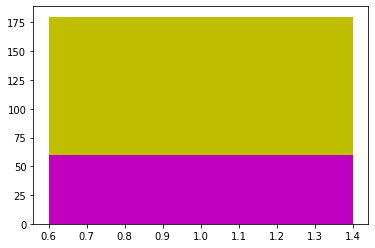

In [91]:
print(years)
print(well)

width = 0.35   

for idx, value in enumerate(years):
    if idx == 0:
        plt.bar(1, value, color=color_by_grain(well[idx]))
    else:
        plt.bar(1, value, color=color_by_grain(well[idx]), bottom=years[idx - 1])

